In [1]:
import os

os.chdir("/Users/tunganhnguyen/Library/CloudStorage/GoogleDrive-tunganhbgbk@gmail.com/My Drive/Seeing_Machines/self_project/ai_camera/rPPG/EML_rPPG")
os.getcwd()

'/Users/tunganhnguyen/Library/CloudStorage/GoogleDrive-tunganhbgbk@gmail.com/My Drive/Seeing_Machines/self_project/ai_camera/rPPG/EML_rPPG'

In [12]:
data_path = "data/UBFC/DATASET_2/subject1"
meta_data = os.path.join(data_path, "ground_truth.txt")
video_path =  os.path.join(data_path, "vid.avi")

In [3]:
import numpy as np
gt_data = np.loadtxt(meta_data)

In [4]:
gt_data.shape

(3, 1547)

In [9]:
gt_trace = gt_data[0, :].T # 1st row, transpose
gt_hr = gt_data[1, :].T # 2nd row, transpose
gt_time = gt_data[2, :].T # 3rd row, transpose

print(f"  Number of PPG signal values: {len(gt_trace)}")
print(f"  Length of ground truth signal: {gt_time[-1]:.2f} seconds")

  Number of PPG signal values: 1547
  Length of ground truth signal: 52.69 seconds


Matplotlib is building the font cache; this may take a moment.


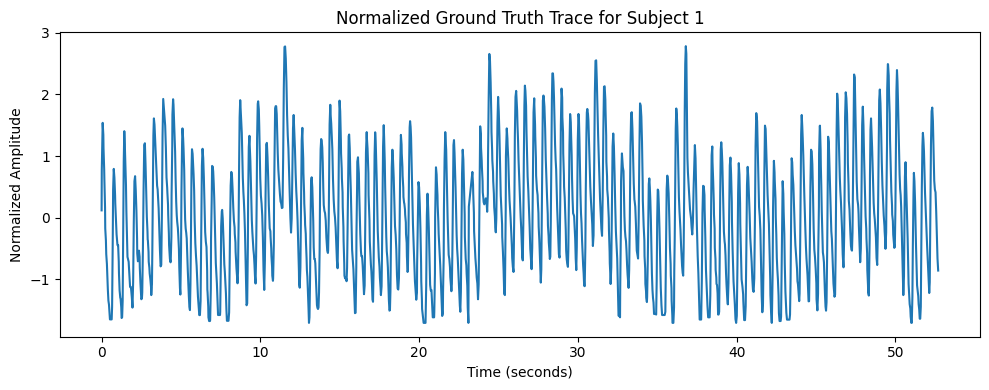

In [10]:
import matplotlib.pyplot as plt
# Plot after normalization
if gt_time is not None and len(gt_time) == len(gt_trace):
    plt.figure(figsize=(10, 4))
    plt.plot(gt_time, gt_trace)
    plt.title(f'Normalized Ground Truth Trace for Subject 1')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Normalized Amplitude')
    plt.tight_layout()
    plt.show()
else:
    print("Time data is not available or does not match the length of the trace data.")

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

video_path = "your_video.mp4"

if not os.path.exists(video_path):
    print(f"Error: Video file '{video_path}' not found.")

vid_obj = cv2.VideoCapture(video_path)

if not vid_obj.isOpened():
    print(f"Error: Could not open video file {video_path}.")

fps = vid_obj.get(cv2.CAP_PROP_FPS)
total_frames = int(vid_obj.get(cv2.CAP_PROP_FRAME_COUNT))
video_length_sec = total_frames / fps if fps > 0 else 0

print(f"Frame Rate (FPS): {fps:.2f}")
print(f"Total Number of Frames: {total_frames}")
print(f"Length of Video: {video_length_sec:.2f} seconds")

# Display frames inside notebook
n = 0
plt.ion()  # enable interactive mode

while True:
    ret, frame = vid_obj.read()
    if not ret:
        break

    n += 1

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title(f"Frame {n}")
    plt.show()
    plt.pause(0.001)  # small delay to update

vid_obj.release()
plt.ioff()


  Frame Rate (FPS): 29.26
  Total Number of Frames: 1547
  Length of Video: 52.86 seconds


: 